# Environment Check

Check that environment containing quantum libaries is being used.
qc jupyter kernel is running using libraries in the conda environent

In [1]:
! conda env list

# conda environments:
#
base                     /Users/eve/anaconda3
Code                     /Users/eve/anaconda3/envs/Code
python39              *  /Users/eve/anaconda3/envs/python39



In [2]:
import sys
print(sys.executable)

/Library/Developer/CommandLineTools/usr/bin/python3


In [3]:
! jupyter kernelspec list

Available kernels:
  python3    /Users/eve/Library/Python/3.9/share/jupyter/kernels/python3


# Homework 2: Basic Quantum Programs

First, we will begin by importing Qiskit, IBM's quantum computing software that is written in Python! To create an experiment and run it, we will need to use Qiskit's Circuits, Registers, and Compilers. Programming using qiskit allows us to programmatically extend QASM code to use for loops and if statements to design circuits faster.  QASM is an assembler-like instruction set that allows you to specify quantum circuits.

#### Import libraries and simulator
Aes is a backend simulator for the IBM quantum computers (other backends are run on real QC). Numpy is good with arrays and matrices. pyplot is for visualization of probability distributions.

In [4]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, assemble
import matplotlib.pyplot as plt
import numpy as np


print('qiskit vers.= %s'%qiskit.__version__)

qiskit vers.= 0.25.1


Setting __AER backends(simulators)__:\
the `qasm_simulator` simulates a true backend and gets the probabilistic results using shots;\
the `statevector_simulator` returns an actual ideal vector of probabilities\



In [5]:
#settings and backends
shots = 1024
simulator = Aer.get_backend('qasm_simulator')
state_vector_sim = Aer.get_backend('statevector_simulator')

## 1. Demo: Superposition

First, we will demonstrate __quantum superposition__. This will be accomplished using a one-qubit quantum circuit that has a single gate: the __Hadamard operation__, $\mathbf{H}$. The qubit is initialized to the computational __basis vector__ $|0\rangle$ and is then applied to the Hadamard gate.  Whenever the resulting __state vector__ for the evolved wavefunction is examined, it is observed that the __probability amplitudes__ for both $|0\rangle$ and $|1\rangle$ are equal to $\frac{1}{\sqrt{2}}$, indicating __maximal superposition__ of the qubit. 

`QuantumCircuit` stores data registers \
`QuantumRegister` are where the qubit values are initialized and stored.\
`ClassicalRegister` are used to store the results of quantum registers when measured.\
`qc.measure(qr,cr)` is used to measure and put quantum result in register\
Commands `qc.h` are the Hadamard gate.


STATEVECTOR:  Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

QUANTUM CIRCUIT DIAGRAM:


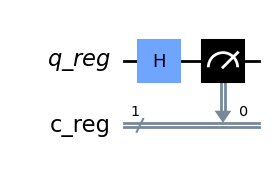

In [6]:
qr = QuantumRegister(1, 'q_reg')
cr = ClassicalRegister(1, 'c_reg')
qc = QuantumCircuit(qr, cr)

qc.h(qr[0])

#Must find state vector for wavefunction before you add measurement operators!
#(Measurement operators cause wavefunction collapse)
state_vector = execute(qc,state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

qc.measure(qr, cr)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw(output="mpl")

We can see the opensource QASM assembly code specification of the circuit.

In [7]:
print('\nQASM SPECIFICATION:')
for i in qc.qasm():
    print(i,end='')


QASM SPECIFICATION:
OPENQASM 2.0;
include "qelib1.inc";
qreg q_reg[1];
creg c_reg[1];
h q_reg[0];
measure q_reg[0] -> c_reg[0];


A __measurement operation__ placed after the Hadamard gate causes it to collapse into one of the computational basis states. We are measuring in the __Pauli-Z__ measurement basis. We will simulate this circuit 1,024 times (this is called the number of __"shots"__ in the IBMQ environment). The measurement operator "observes" the quantum information and places the measurement output into the classical register. Once the circuit is complete with registers, a state transformation, and a measurement operation, experiments will be run using the Qiskit Aer simulator. Note how after each run, the output distribution varies slightly, but is close to a 50/50 split between the basis states $|0\rangle$ and $|1\rangle$ whenever the input quantum state is in a basis state.


SIMULATION RESULTS:
Simulation distribution 0: {'1': 507, '0': 517}


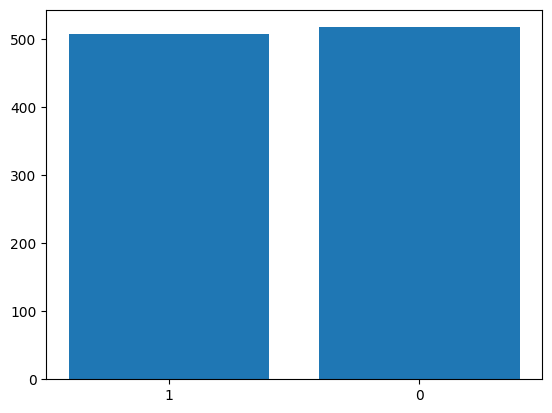

Simulation distribution 1: {'0': 493, '1': 531}


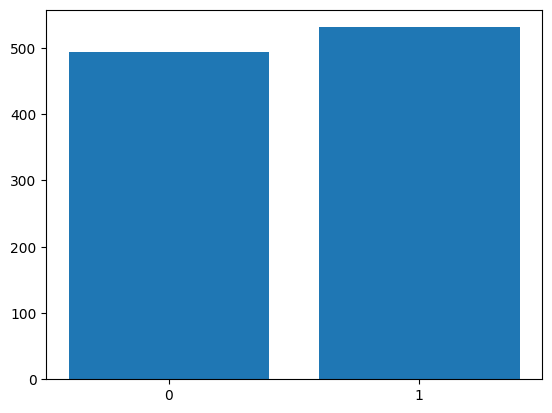

Simulation distribution 2: {'1': 464, '0': 560}


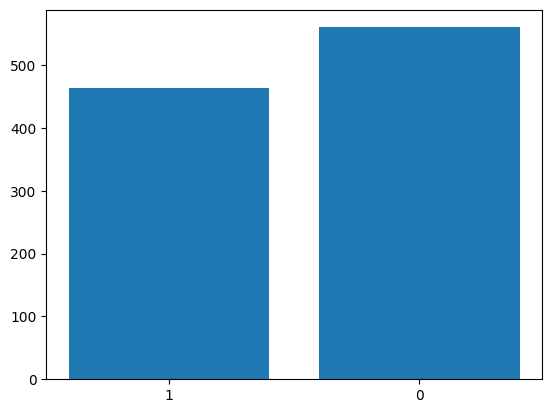

In [8]:
print('\nSIMULATION RESULTS:')
for i in range(0,3):
    job = execute(qc,simulator,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    plt.show()

## 2. Rotations X and Z

We will experiment with Pauli-__X__ and Pauli-__Z__; known as the bit flip and phase flip operators. Pauli __Y__ gate can be considered as a bit and phase flip gate 


STATEVECTOR:  Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

QUANTUM CIRCUIT DIAGRAM:


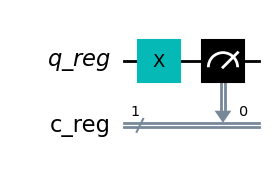

In [9]:
qr = QuantumRegister(1, 'q_reg')
cr = ClassicalRegister(1, 'c_reg')
qc = QuantumCircuit(qr, cr)

qc.x(qr[0])

#Must find state vector for wavefunction before you add measurement operators!
#(Measurement operators cause wavefunction collapse)
state_vector = execute(qc,state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

qc.measure(qr, cr)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw(output="mpl")

We can see the value is flipped to ket 1


SIMULATION RESULTS:
Simulation distribution 0: {'1': 1024}


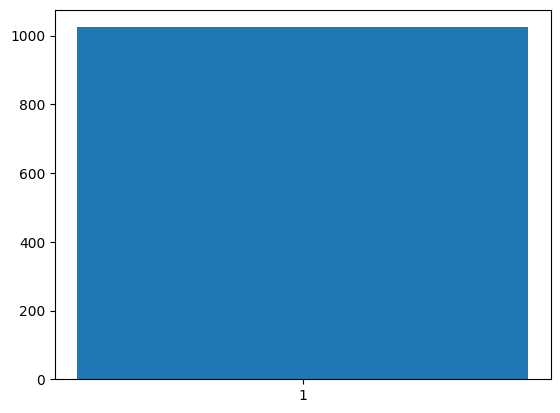

In [10]:
print('\nSIMULATION RESULTS:')
for i in range(0,1):
    job = execute(qc,simulator,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    plt.show()

### 2.1 Phase flip

In [11]:
qr = QuantumRegister(1, 'q_reg')
cr = ClassicalRegister(1, 'c_reg')
qc = QuantumCircuit(qr, cr)

qc.z(qr[0])




STATEVECTOR:  Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))

QUANTUM CIRCUIT DIAGRAM:

SIMULATION RESULTS:
Simulation distribution 0: {'0': 1024}


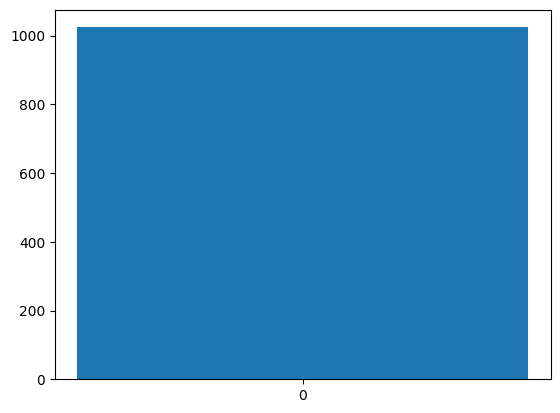

In [12]:
#Must find state vector for wavefunction before you add measurement operators!
#(Measurement operators cause wavefunction collapse)
state_vector = execute(qc,state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

qc.measure(qr, cr)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw(output="mpl")
print('\nSIMULATION RESULTS:')
for i in range(0,1):
    job = execute(qc,simulator,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    plt.show()

### 2.2 Question 1: Why is the phase flip not changing the probability? Implement a Pauli-X using Hadamard and Pauli-Z gates only and test measurement.

Insert the answer to Question 1 HERE

### 2.3 Parameterized rotations
Qiskit has parameterized rotations `rx, ry, rz`.
The most generalized qubit is the `U3` operator in Qiskit

In [13]:
from math import pi, sqrt

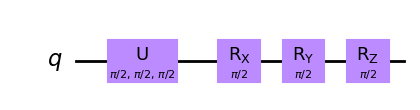

In [14]:
qc = QuantumCircuit(1)
qc.u(pi/2, pi/2, pi/2, 0)
qc.rx(pi/2,0)
qc.ry(pi/2,0)
qc.rz(pi/2,0)
qc.draw(output="mpl")

### 2.4 Question 2: Create a Hadamard gate using only the rx,ry,rz functions.

Insert the answer to Question 2 HERE

## 3. Multiqubit Systems and Specified Rotations Visualized
We now experiment with multiqubit systems.


STATEVECTOR:  Statevector([-6.49467042e-17-0.35355339j, -6.49467042e-17-0.35355339j,
              2.16489014e-17+0.35355339j,  2.16489014e-17+0.35355339j,
              2.16489014e-17+0.35355339j,  2.16489014e-17+0.35355339j,
              2.16489014e-17-0.35355339j,  2.16489014e-17-0.35355339j],
            dims=(2, 2, 2))

QUANTUM CIRCUIT DIAGRAM:


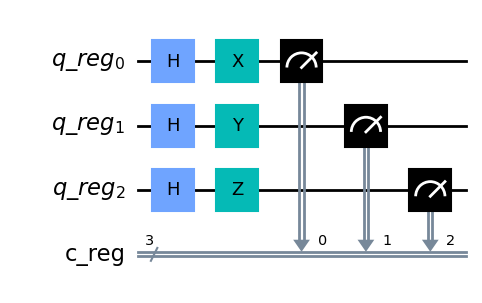

In [15]:
qr2 = QuantumRegister(3, 'q_reg')
cr2 = ClassicalRegister(3, 'c_reg')
qc2 = QuantumCircuit(qr2, cr2)
qc2.h(qr2[0])
qc2.x(qr2[0])

qc2.h(qr2[1])
qc2.y(qr2[1])

qc2.h(qr2[2])
qc2.z(qr2[2])

state_vector2 = execute(qc2,state_vector_sim).result()
vector2 = state_vector2.get_statevector(qc2)
print('\nSTATEVECTOR: ', vector2)

qc2.measure(qr2, cr2)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc2.draw(output="mpl")

### 3.1 Question 3: Notice the statevector size is increased. What calculation results in the increased size? What is the growth rate relationship between statevector size and number of qubits, and what is one implication of this?

Insert the Answer to Question 3 HERE

## 4. Run Hadamard on a Real Quantum Computer

To use this notebook, you must copy your API token from the "My Account" page on the IBMQ Experience.

Create an IBMQ account and run a Hadamard gate. https://github.com/Qiskit/qiskit-ibmq-provider

More information about the tokens is available in the instructions document for this homework.  Also, be aware that the
commented out "IBMQ.save_account(token)" should be uncommented the first time you run this code since your token will be
saved to your local disk drive.  You can comment out this line afterward, since your token will have already been saved.

Also note that, running this code more than once in the same session will cause a warning to be issued when the 
"provider=IBMQ.load_account()" is re-executed since your account will have already been loaded the first time.
You can ignore this warning.


In [17]:
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

#paste your token from the IBM Q here
token = "af20cdee3bd074af935caeefbd7a21adb4914ed92587f43f761e1f073f7c8a65a40a20b7def7a7e82db31f31c8e0d83ccaed9f63c5fa5b6c6001b18bff5743bb"

# The following statement 'save.account' only needs to be run once, since your token will be saved to disk
IBMQ.save_account(token)
try:
    provider = IBMQ.load_account()
    backend = provider.get_backend('ibmq_qasm_simulator')
    
except:
    print(
        """WARNING: No valid IBMQ credentials found on disk.
             You must store your credentials using IBMQ.save_account(token, url).
             For now, there's only access to local simulator backends..."""
    )
    exit(0)
    pass


configrc.store_credentials:WARNING:2023-09-26 23:15:31,140: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-09-26 23:15:31,494: Credentials are already in use. The existing account in the session will be replaced.


This shows the types of ibm backend cloud devices. Note that each backend has a specific qubit architecture.

In [18]:
#see a list of available remote backends
ibmq_backends = provider.backends()
print("Remote backends: ", ibmq_backends)

Remote backends:  [<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]


We will select the least busy backend with at least 2 qubits

In [19]:
# allocate the least busy device with at least 2 qubits
try:
    least_busy_device = least_busy(
        provider.backends(filters=lambda x: x.configuration().n_qubits >= 2, simulator=False)
    )
except:
    print("All devices are currently unavailable.")

In [20]:
# Output selected device based on least queue/load
print("Running on current least busy device: ", least_busy_device)

Running on current least busy device:  ibm_nairobi


### Question 4: Describe the specific IBM backend you will use above and the transmon qubit properties.

Insert the answer to Question 4 HERE


STATEVECTOR:  Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

QUANTUM CIRCUIT DIAGRAM:


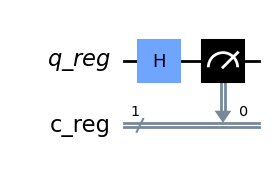

In [21]:
# Qiskit package imports
from qiskit import QuantumCircuit
from qiskit import execute, IBMQ, BasicAer



qr = QuantumRegister(1, 'q_reg')
cr = ClassicalRegister(1, 'c_reg')
qc = QuantumCircuit(qr, cr)

qc.h(qr[0])

#Must find state vector for wavefunction before you add measurement operators!
#(Measurement operators cause wavefunction collapse)
state_vector = execute(qc,state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

qc.measure(qr, cr)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw(output="mpl")

In [ ]:
# output the specified quantum circuit
print('\nQUANTUM CIRCUIT DIAGRAM:')
print(qc.draw())
print('\nQASM CIRCUIT SPECIFICATION:')
for i in qc.qasm():
    print(i,end='')
       
# execute the quantum circuit and output the results of the execution
print('\nACTUAL EXECUTION RESULTS:')
for i in range(0,3):
    job_exp = execute(qc, least_busy_device, shots=1024)
    result_exp = job_exp.result()
    counts = result_exp.get_counts(qc)
    print('Actual execution distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    plt.title("Qubit Measurement Histogram: "+i)
    plt.show()


### Question 5: Describe any systematic/random errors in the histogram distributions between the ideal simulator and the quantum computer. What can be causing these differences (or the lack thereof)?

Insert the answer to Question 5 HERE

## 5. Export this Jupyter notebook to html and submit it by emailing to erhenderson@smu.edu, hendersonj@smu.edu, and mitch@smu.edu.